libraries

In [3]:
#importing required libraries
import pandas as pd
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error,r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import prophet
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import AutoReg

Data reading

In [6]:
import pandas as pd # Redundant import for troubleshooting
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('unemployment-insurance-beneficiaries-and-benefit-amounts-paid-beginning-2001-1 (1).csv')
df.head()
df.info()
df.shape
print(df.isna().sum())
print(df.Region.value_counts())
print(df.duplicated().sum())
df.columns = df.columns.str.strip()
df['Beneficiaries_diff']=df['Beneficiaries'].diff() #creation of Beneficiaries_diff colounm

Saving unemployment-insurance-beneficiaries-and-benefit-amounts-paid-beginning-2001-1 (1).csv to unemployment-insurance-beneficiaries-and-benefit-amounts-paid-beginning-2001-1 (1) (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         13760 non-null  int64 
 1   Month                        13760 non-null  int64 
 2   Region                       13760 non-null  object
 3   County                       13760 non-null  object
 4   Beneficiaries                13760 non-null  int64 
 5    Benefit Amounts (Dollars)   13760 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 645.1+ KB
Year                           0
Month                          0
Region                         0
County                         0
Beneficiaries                  0
 Benefit Amounts (Dollars)     

Visualization and analysis

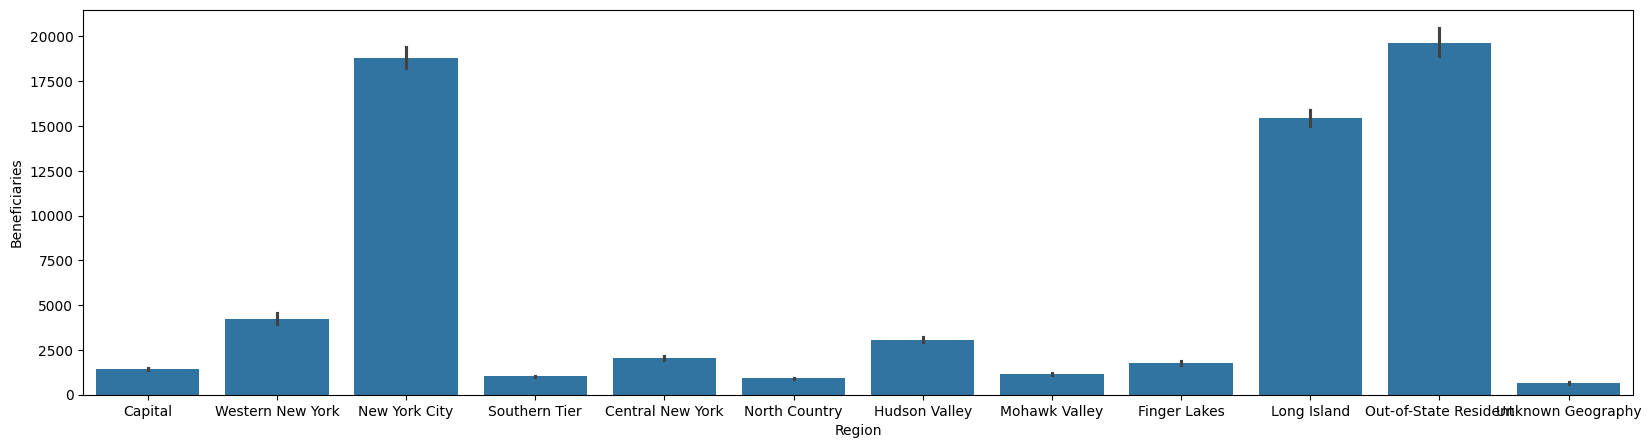

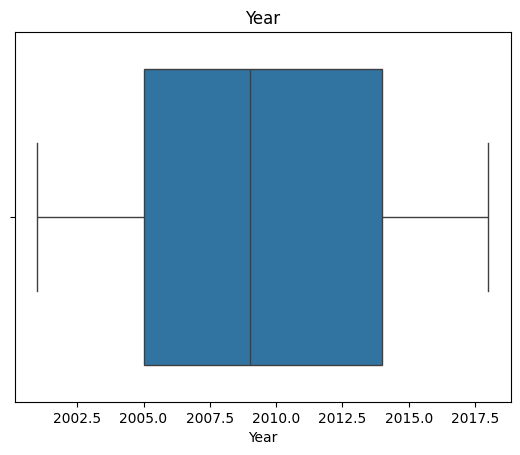

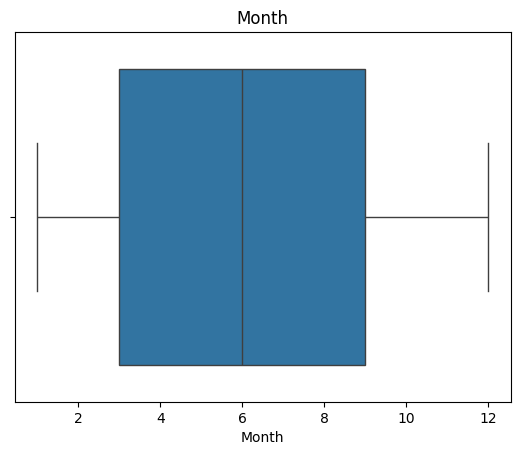

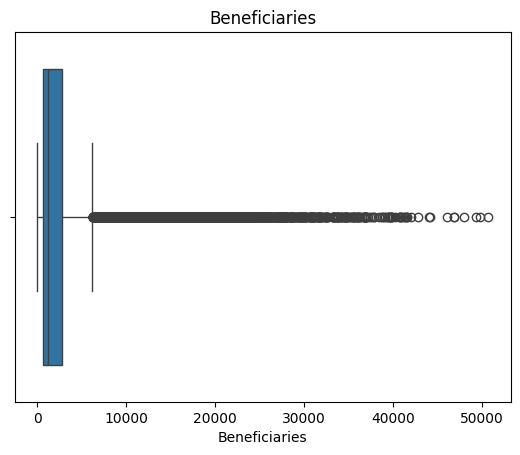

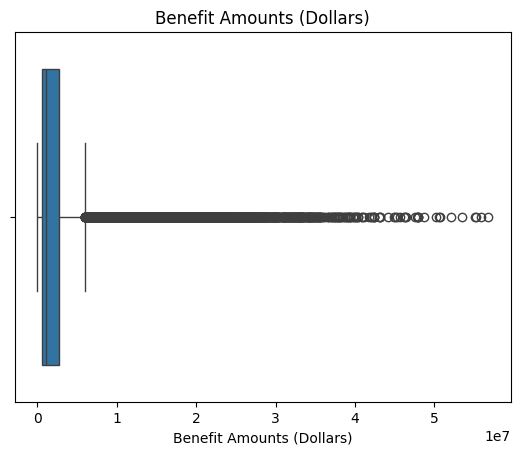

,Year,Month,Beneficiaries,Benefit Amounts (Dollars),Beneficiaries_diff
count,13760.000000,13760.000000,13760.000000,1.376000e+04,13759.000000
mean,2009.460465,6.474419,3858.335756,3.846968e+06,-0.094484
std,5.167803,3.439709,6557.550710,6.878640e+06,9431.460815
min,2001.000000,1.000000,0.000000,0.000000e+00,-50200.000000
25%,2005.000000,3.000000,600.000000,5.700000e+05,-1200.000000
50%,2009.000000,6.000000,1200.000000,1.110000e+06,0.000000
75%,2014.000000,9.000000,2800.000000,2.720000e+06,1500.000000
max,2018.000000,12.000000,50700.000000,5.681000e+07,49000.000000


In [7]:
#univariate analysis
fig = px.line(df, x='Year', y='Benefit Amounts (Dollars)')
fig.show()
fig = px.line(df, x='Year', y='Beneficiaries')
fig.show()

#Bivariate analysis
df1=df.query("County in ['Hamilton','Kings']")
fig = px.line(df1, x='Year', y='Beneficiaries', color='County')
fig.update_traces(textposition="bottom right")
fig.show()
fig=px.bar(df,x='Region',y='Beneficiaries',color='Region',text_auto=True)
fig.show()

plt.figure(figsize=(20,5))
sns.barplot(x=df.Region,y=df.Beneficiaries)
plt.show()

#Multivariate Analysis
for i in df.columns:
  if(df[i].dtype)=='int64':
    boxplot=sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()
#Decriptive Analysis
df.describe()

Training and testing

In [8]:
df.dropna(inplace=True)

train_size=int(len(df)*0.8)
train,test=df[:train_size],df[train_size:]

Model building

P-Value 1.1755411069411675e-28
P-Value 0.0


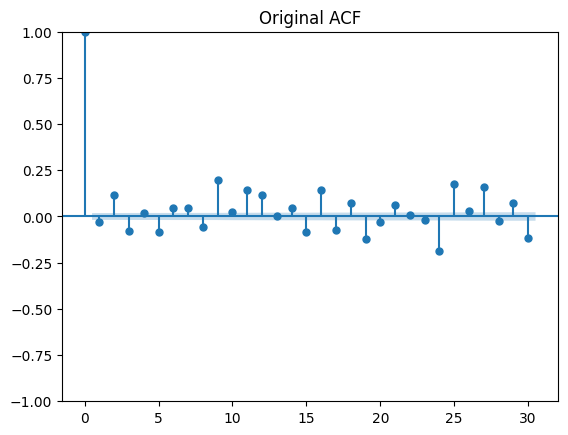

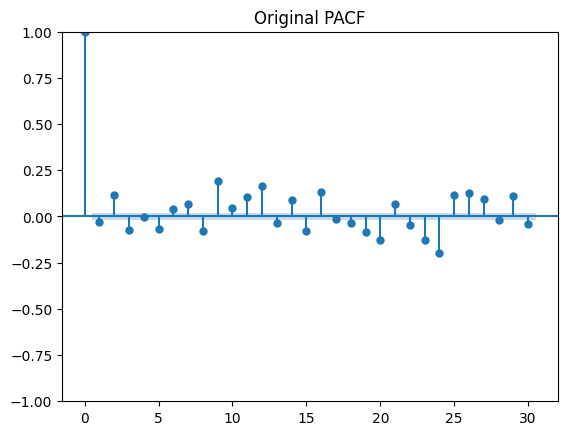

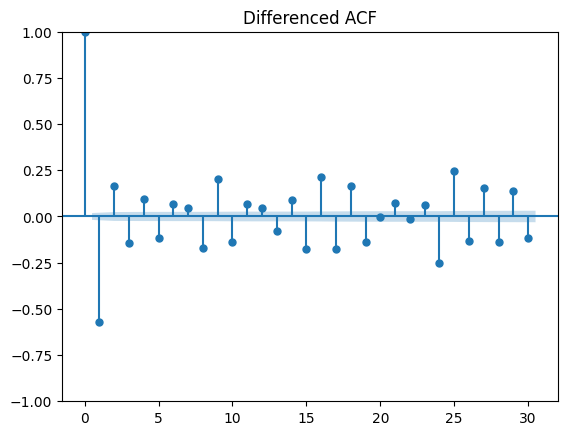

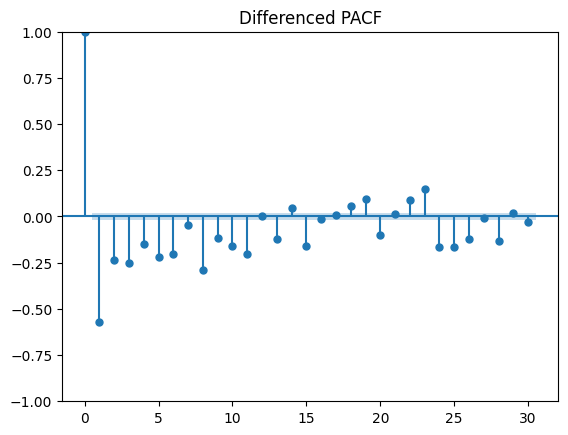

P-Value 1.1755411069411675e-28
P-Value 0.0


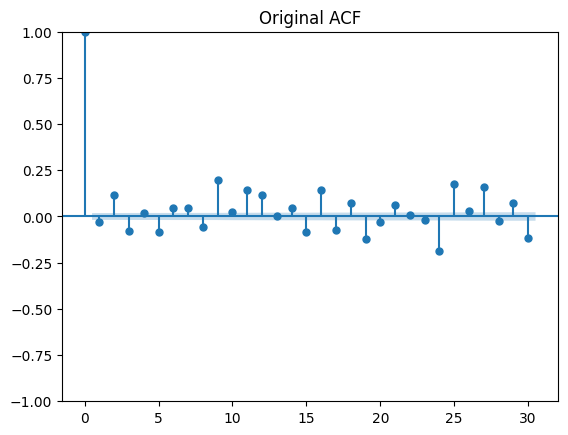

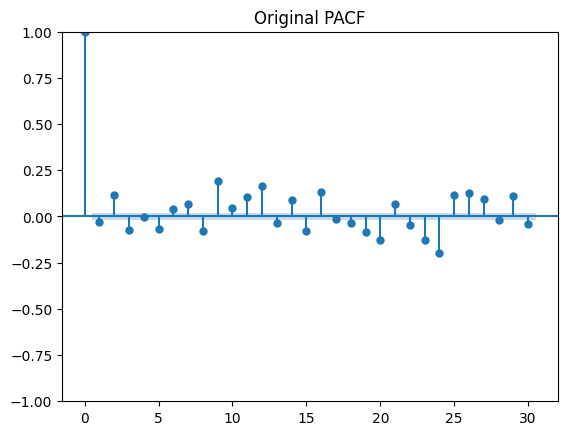

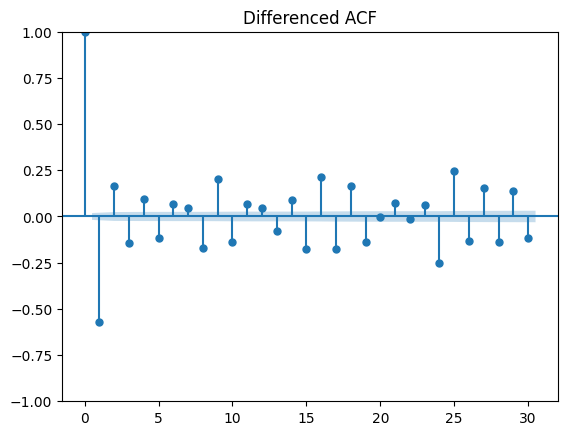

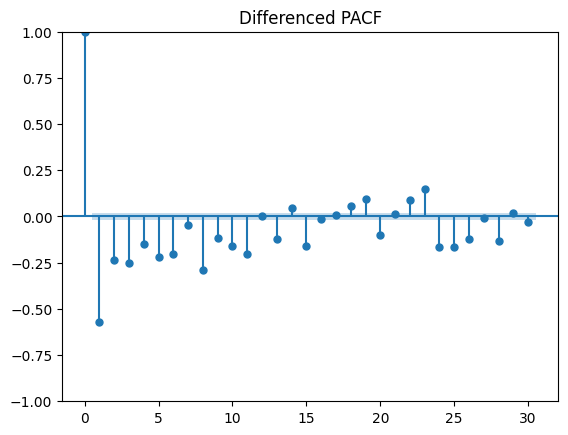

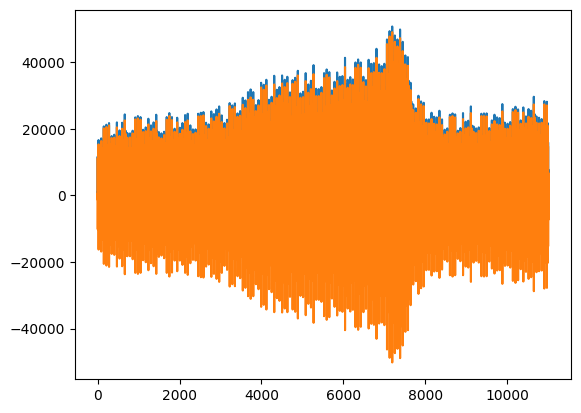

In [9]:
#Augmented Dickey-Fuller test(used to convert non-stationary data to
#stationary data)

adf=adfuller(df['Beneficiaries'],autolag='AIC')
print("P-Value",adf[1])

adf=adfuller(train['Beneficiaries_diff'],autolag='AIC')
print("P-Value",adf[1])

#ACF and PACF(to check how our data is correlated with ACF &PACF)
plot_acf(train['Beneficiaries'], lags=30, title='Original ACF')
plot_pacf(train['Beneficiaries'], lags=30, title='Original PACF')
plt.show()
#differenced ACF and PCAF
plot_acf(train['Beneficiaries_diff'], lags=30, title='Differenced ACF')
plot_pacf(train['Beneficiaries_diff'], lags=30, title='Differenced PACF')
plt.show()
#Augmented Dickey-Fuller test(used to convert non-stationary data to
#stationary data)

adf=adfuller(df['Beneficiaries'],autolag='AIC')
print("P-Value",adf[1])

adf=adfuller(train['Beneficiaries_diff'],autolag='AIC')
print("P-Value",adf[1])

#ACF and PACF(to check how our data is correlated with ACF &PACF)
plot_acf(train['Beneficiaries'], lags=30, title='Original ACF')
plot_pacf(train['Beneficiaries'], lags=30, title='Original PACF')
plt.show()
#differenced ACF and PCAF
plot_acf(train['Beneficiaries_diff'].dropna(), lags=30, title='Differenced ACF')
plot_pacf(train['Beneficiaries_diff'].dropna(), lags=30, title='Differenced PACF')
plt.show()


#smoothing out our data(visual representation)
plt.plot(train['Beneficiaries'])
plt.plot(train['Beneficiaries_diff'])
plt.show()



In [10]:
'''
numpy.dtype size changed, may indicate binary incompatibility.
 Expected 96 from C header, got 88 from PyObject
this is the error i got while running this block

from pmdarima import auto_arima
stepwise =auto_arima(df['Beneficiaries_diff'],trace=True,suppress_warnings=True)
stepwise.summary()
'''

"\nnumpy.dtype size changed, may indicate binary incompatibility.\n Expected 96 from C header, got 88 from PyObject\nthis is the error i got while running this block\n\nfrom pmdarima import auto_arima\nstepwise =auto_arima(df['Beneficiaries_diff'],trace=True,suppress_warnings=True)\nstepwise.summary()\n"

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Beneficiaries_diff'].dropna(), order=(5,0,0)) # Pass the series with the correct index
model_arima=model.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Beneficiaries_diff   No. Observations:                11007
Model:                 ARIMA(5, 0, 0)   Log Likelihood             -112883.845
Date:                Sun, 29 Jun 2025   AIC                         225781.690
Time:                        05:43:52   BIC                         225832.834
Sample:                             0   HQIC                        225798.919
                              - 11007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1272     21.475     -0.006      0.995     -42.218      41.963
ar.L1         -0.8365      0.013    -63.908      0.000      -0.862      -0.811
ar.L2         -0.5560      0.016    -35.844      0.000      -0.586      -0.526
ar.L3         -0.4685      0.014    -34.636      0.000      -0.495      -0.442
ar.L4         -0.3228      0.015    -21.196      0.000      -0.353      -0.293
ar.L5         -0.2190      0.011    -19.783      0.000      -0.241      -0.197
sigma2      4.737e+07      0.001   4.15e+10      0.000    4.74e+07    4.74e+07
===================================================================================
Ljung-Box (L1) (Q):                  22.29   Jarque-Bera (JB):             33225.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             2.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+24. Standard errors may be unstable.
"""

In [12]:
#SARIMA
model=SARIMAX(train['Beneficiaries_diff'].dropna(),order=(5,0,0),seasonal_order=(0,1,2,3))
model_sarima=model.fit()
model_sarima.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                     Beneficiaries_diff   No. Observations:                11007
Model:             SARIMAX(5, 0, 0)x(0, 1, [1, 2], 3)   Log Likelihood             -112876.095
Date:                                Sun, 29 Jun 2025   AIC                         225768.189
Time:                                        05:44:23   BIC                         225826.637
Sample:                                             0   HQIC                        225787.880
                                              - 11007                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0204      0.035    -29.217      0.000      -1.089      -0.952
ar.L2         -0.9208      0.039    -23.804      0.000      -0.997      -0.845
ar.L3         -0.0303      0.035     -0.867      0.386      -0.099       0.038
ar.L4          0.0330      0.045      0.739      0.460      -0.055       0.121
ar.L5         -0.1018      0.039     -2.587      0.010      -0.179      -0.025
ma.S.L3       -1.9940      0.002  -1043.359      0.000      -1.998      -1.990
ma.S.L6        0.9942      0.002    520.069      0.000       0.990       0.998
sigma2       7.82e+07   1.87e-09   4.19e+16      0.000    7.82e+07    7.82e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):             29512.65
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             2.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.84e+31. Standard errors may be unstable.
"""

In [13]:

#Auto Regression
model_ar=AutoReg(train['Beneficiaries_diff'].dropna(), lags=10).fit()
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:     Beneficiaries_diff   No. Observations:                11007
Model:                    AutoReg(10)   Log Likelihood             -111831.450
Method:               Conditional MLE   S.D. of innovations           6312.773
Date:                Sun, 29 Jun 2025   AIC                         223686.900
Time:                        05:44:23   BIC                         223774.565
Sample:                            10   HQIC                        223716.434
                                11007                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0141     60.198     -0.000      1.000    -118.000     117.972
Beneficiaries_diff.L1     -0.9574      0.009   -101.734      0.000      -0.976      -0.939
Beneficiaries_diff.L2     -0.8113      0.013    -63.106      0.000      -0.837      -0.786
Beneficiaries_diff.L3     -0.8197      0.014    -57.846      0.000      -0.847      -0.792
Beneficiaries_diff.L4     -0.7496      0.015    -48.565      0.000      -0.780      -0.719
Beneficiaries_diff.L5     -0.7656      0.016    -48.026      0.000      -0.797      -0.734
Beneficiaries_diff.L6     -0.6221      0.016    -39.021      0.000      -0.653      -0.591
Beneficiaries_diff.L7     -0.5102      0.015    -33.056      0.000      -0.540      -0.480
Beneficiaries_diff.L8     -0.5172      0.014    -36.502      0.000      -0.545      -0.489
Beneficiaries_diff.L9     -0.2697      0.013    -20.980      0.000      -0.295      -0.245
Beneficiaries_diff.L10    -0.1618      0.009    -17.190      0.000      -0.180      -0.143
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8870           -0.6690j            1.1110           -0.1029
AR.2             0.8870           +0.6690j            1.1110            0.1029
AR.3             0.4171           -1.1018j            1.1781           -0.1924
AR.4             0.4171           +1.1018j            1.1781            0.1924
AR.5            -1.0676           -0.3136j            1.1127           -0.4545
AR.6            -1.0676           +0.3136j            1.1127            0.4545
AR.7            -0.7111           -1.0654j            1.2809           -0.3437
AR.8            -0.7111           +1.0654j            1.2809            0.3437
AR.9            -0.3590           -1.2835j            1.3328           -0.2934
AR.10           -0.3590           +1.2835j            1.3328            0.2934
------------------------------------------------------------------------------
"""

In [14]:
#Prophet
model =VAR(train[['Beneficiaries_diff','Benefit Amounts (Dollars)']].dropna()) # Add dropna()
model_AR = model.fit(maxlags=10)
model_AR.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 29, Jun, 2025
Time:                     05:44:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    44.6396
Nobs:                     10997.0    HQIC:                   44.6211
Log likelihood:          -276464.    FPE:                2.36930e+19
AIC:                      44.6117    Det(Omega_mle):     2.36028e+19
--------------------------------------------------------------------
Results for equation Beneficiaries_diff
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                              2437.660425       113.470180           21.483           0.000
L1.Beneficiaries_diff                -0.958505         0.071387          -13.427

Prermofance Test of the model

In [15]:
#Arima
prediction_arima =model_arima.predict(start=len(train),
                                    end=len(train)+len(test)-1,
                                    type='levels')
prediction_arima


,predicted_mean
11007,925.676208
11008,483.935480
11009,63.026758
11010,907.518897
11011,-1276.338955
...,...
13754,-0.127192
13755,-0.127192
13756,-0.127192
13757,-0.127192


In [16]:
#metrics for checking the model
print(mean_squared_error(test['Beneficiaries_diff'],prediction_arima))
print(mean_absolute_error(test['Beneficiaries_diff'],prediction_arima))
print(r2_score(test['Beneficiaries_diff'],prediction_arima))

102763733.35841592
5691.3713943589655
-8.184450493908813e-05


In [17]:
#SARIMA
prediction_sarima=model_sarima.predict(start=len(train),
                               end=len(train)+ len(test)-1,
                               type='levels')
#metric check for SARIMA
print(mean_squared_error(test['Beneficiaries_diff'],prediction_sarima))
print(mean_absolute_error(test['Beneficiaries_diff'],prediction_sarima))

103407466.6558495
5833.0826353155


In [18]:

#building  AR model
predictions_ar=model_ar.predict(start=len(train),end=len(train)+len(test)-1)
#building VAR model
prediction_var = model_AR.forecast(train[['Beneficiaries_diff','Benefit Amounts (Dollars)']].values,steps=5)


In [19]:
'''
import prophet
forecast=model_prophet.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()
future = model_prophet.make_future_dataframe(periods=len(test))
'''

"\nimport prophet\nforecast=model_prophet.predict(future)\nforecast[['ds','yhat','yhat_lower','yhat_upper']].head()\nfuture = model_prophet.make_future_dataframe(periods=len(test))\n"

Saving The model

In [20]:
import prophet

# Prepare the data for Prophet
# Prophet requires the dataframe to have columns named 'ds' and 'y'
prophet_df = df[['Year', 'Month', 'Beneficiaries']].copy()
prophet_df['ds'] = pd.to_datetime(prophet_df['Year'].astype(str) + '-' + prophet_df['Month'].astype(str))
prophet_df = prophet_df[['ds', 'Beneficiaries']].rename(columns={'Beneficiaries': 'y'})

# Instantiate and fit the Prophet model
model_prophet = prophet.Prophet()
model_prophet.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6puijttp/cpvqqj6n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6puijttp/upk5m3oq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21581', 'data', 'file=/tmp/tmp6puijttp/cpvqqj6n.json', 'init=/tmp/tmp6puijttp/upk5m3oq.json', 'output', 'file=/tmp/tmp6puijttp/prophet_model68es8kd9/prophet_model-20250629054446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2001-01-01,4850.952377,-3841.628291,13082.963692
1,2001-02-01,4636.011708,-3590.288989,13228.017087
2,2001-03-01,4531.799997,-3904.731142,12639.190855
3,2001-04-01,4423.377526,-4140.272554,12120.491272
4,2001-05-01,3827.318423,-4705.729534,12723.289905


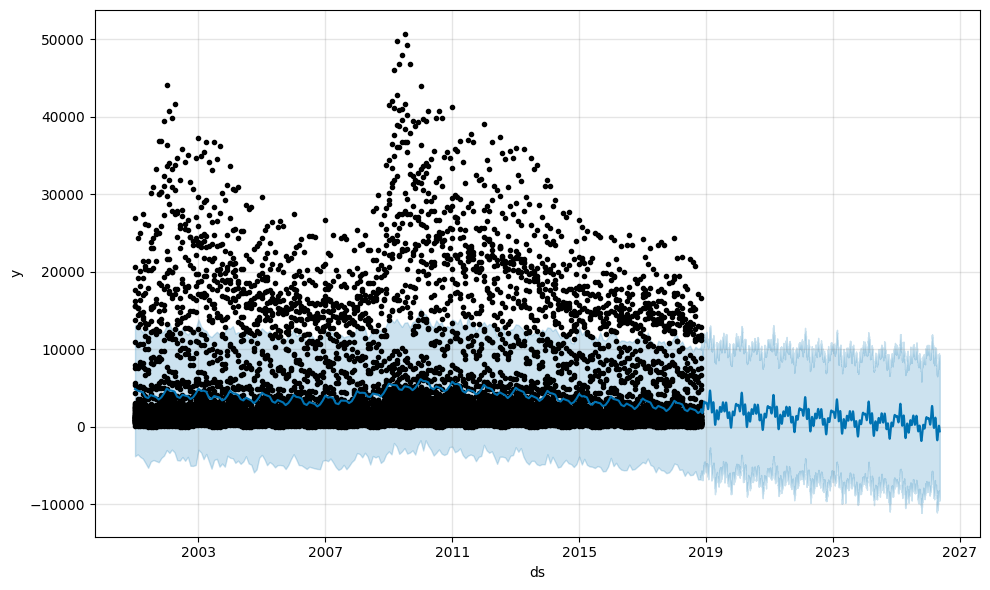

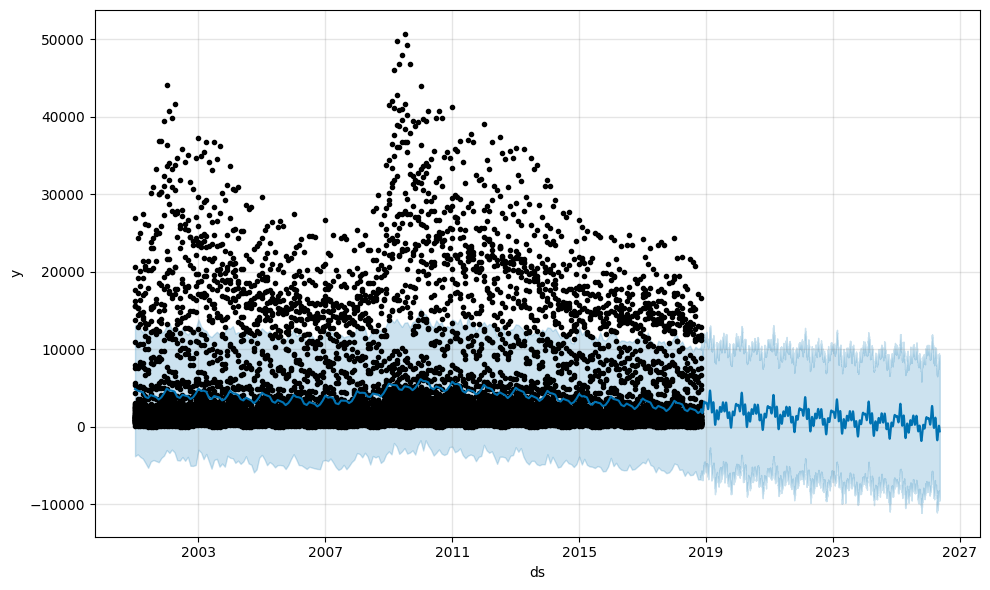

In [21]:
# Make future predictions
# Create a dataframe with future dates for prediction
future = model_prophet.make_future_dataframe(periods=len(test))
# Predict future values
forecast = model_prophet.predict(future)
# Display the predictions
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model_prophet.plot(forecast)

In [22]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(model_prophet,f)

In [23]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate the Prophet model
# Align the test data with the forecast
# Find the intersection of dates in test and forecast
test_dates = pd.to_datetime(test['Year'].astype(str) + '-' + test['Month'].astype(str))
forecast_test = forecast[forecast['ds'].isin(test_dates)]

# Align the actual values from the test set
actual_values = test.set_index(test_dates)['Beneficiaries']

# Ensure both series have the same index before calculating metrics
forecast_aligned = forecast_test.set_index('ds')['yhat']
actual_aligned = actual_values[forecast_aligned.index]


# Calculate evaluation metrics
# Note: Prophet's 'yhat' is a prediction of the original series, not the differenced series
mse = mean_squared_error(actual_aligned, forecast_aligned)
mae = mean_absolute_error(actual_aligned, forecast_aligned)
rmse = np.sqrt(mse)

print(f"Prophet Model Mean Squared Error: {mse}")
print(f"Prophet Model Mean Absolute Error: {mae}")
print(f"Prophet Model Root Mean Squared Error: {rmse}")
'''

'\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\nimport numpy as np\n\n# Evaluate the Prophet model\n# Align the test data with the forecast\n# Find the intersection of dates in test and forecast\ntest_dates = pd.to_datetime(test[\'Year\'].astype(str) + \'-\' + test[\'Month\'].astype(str))\nforecast_test = forecast[forecast[\'ds\'].isin(test_dates)]\n\n# Align the actual values from the test set\nactual_values = test.set_index(test_dates)[\'Beneficiaries\']\n\n# Ensure both series have the same index before calculating metrics\nforecast_aligned = forecast_test.set_index(\'ds\')[\'yhat\']\nactual_aligned = actual_values[forecast_aligned.index]\n\n\n# Calculate evaluation metrics\n# Note: Prophet\'s \'yhat\' is a prediction of the original series, not the differenced series\nmse = mean_squared_error(actual_aligned, forecast_aligned)\nmae = mean_absolute_error(actual_aligned, forecast_aligned)\nrmse = np.sqrt(mse)\n\nprint(f"Prophet Model Mean Squared Error: {mse}")

Application Building

In [24]:
'''
from flask import Flask, render_template, request
import pandas as pd
import numpy as np
from prophet import Prophet
import pickle
import plotly.express as px

app = Flask(__name__)

# Load the trained Prophet model
model_prophet = Prophet()

# Assuming you have a trained model stored in a file
model_prophet = Prophet()

with open('model.pkl', 'rb') as file:
    model_prophet = pickle.load(file)

@app.route("/")
def f():
    return render_template("index.html")

@app.route("/inspect")
def inspect():
    return render_template("inspect.html")

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        try:
            # Get user input
            input_date = pd.to_datetime(request.form['input_date'])

            # Create a dataframe for the input date
            future_date = pd.DataFrame({'ds': [input_date]})

            # Make prediction
            forecast = model_prophet.predict(future_date)
            predicted_value = forecast['yhat'].values[0]

            # Plot the forecast using Plotly
            fig = px.line(forecast, x='ds', y='yhat', title='Insurance Forecast')
            graph = fig.to_html(full_html=False)

            return render_template('output.html', prediction=np.round(predicted_value), graph=graph)

        except Exception as e:
            return render_template('output.html', error=f"An error occurred: {str(e)}")

    return render_template('output.html', prediction=None, graph=None)

if __name__ == '__main__':
    app.run(debug=True)
'''